<a href="https://colab.research.google.com/github/asepmuhidin/MK-Data-Mining-UPB/blob/main/decisionTreeC6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math

In [2]:
si=[4,10]
S=sum(si)
S

14

In [4]:
entropi_total=(-si[0]/S * math.log2(si[0]/S))+(-si[1]/S * math.log2(si[1]/S))
entropi_total

0.863120568566631

In [8]:
entro_total=0
for i in si:
  entro_total +=-i/S * math.log2(i/S)
entro_total

0.863120568566631

In [15]:
def entropi(si):
  entro_total=0
  for i in si:
    entro_total +=-i/sum(si) * math.log2(i/sum(si)) if i>0 else 0
  return entro_total

In [16]:
entropi_total=entropi(si)
entropi_total

0.863120568566631

In [17]:
entro_cloudy=entropi([0,4])
entro_cloudy

0.0

In [18]:
entro_rainy=entropi([1,4])
entro_rainy

0.7219280948873623

In [19]:
entro_sunny=entropi([3,2])
entro_sunny

0.9709505944546686

In [21]:
si_outlook=[[0,4],[1,4],[3,2]]
S=0
for si in si_outlook:
	S +=sum(si)
S

14

In [22]:
entro_si=0
for si in si_outlook:
  entro_si += sum(si)/S *entropi(si)
gain =entropi([4,10])-entro_si
gain

0.2585210366587628

In [28]:
def entropi(si):
  entro_total=0
  for i in si:
    entro_total +=-i/sum(si) * math.log2(i/sum(si)) if i>0 else 0
  return entro_total

def gain(si,si_att):
  entro_sa=0

  for sa in si_att:
    entro_sa += sum(sa)/sum(si) *entropi(sa)

  return entropi(si)-entro_sa

In [29]:
si_total=[4,10]
si_outlook=[[0,4],[1,4],[3,2]]

gain=gain(si_total,si_outlook)
gain

0.2585210366587628

In [30]:
def entropy(s):
    total = sum(s)
    return -sum((count / total) * math.log2(count / total) for count in s if count != 0)

def weighted_entropy(s, si):
    total = sum(s)
    return sum((sum(subset) / total) * entropy(subset) for subset in si)

def information_gain(s, si):
    return entropy(s) - weighted_entropy(s, si)

# Data
s = [4, 10]
si = [[0, 4], [1, 4], [3, 2]]

# Hitung Information Gain
gain = information_gain(s, si)
print(f"Information Gain: {gain}")

Information Gain: 0.2585210366587628


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import  accuracy_score, precision_score, recall_score

In [32]:
df=pd.read_csv("https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/PlayTennis.csv")

In [33]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [34]:
#Label Encoding (Manual)
df['Outlook']=df['Outlook'].map({'Sunny' :0,'Overcast':1,'Rain':2})
df.head()


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,1,Hot,High,Weak,Yes
3,2,Mild,High,Weak,Yes
4,2,Cool,Normal,Weak,Yes


In [35]:
#Label Encoding(Library sklearn)
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()
columns=['Temperature','Humidity','Wind',	'Play Tennis']
df[columns]=df[columns].apply(lambda x :le.fit_transform(x))
df.head()


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,0,1,0,1,0
1,0,1,0,0,0
2,1,1,0,1,1
3,2,2,0,1,1
4,2,0,1,1,1


In [37]:
#Split fiture->target
X=df.drop(columns='Play Tennis')
y=df['Play Tennis']


In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, shuffle=y, random_state=40)

In [43]:
#Fit model
dc=tree.DecisionTreeClassifier(criterion='entropy')
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [44]:
y_pred=dc.predict(x_test)

In [45]:
#Evaluasi
accuracy=accuracy_score(y_test,y_pred)
presisi=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(f"Akurasi model {accuracy*100}")
print(f"Presisi model {presisi*100}")
print(f"Recall model {recall*100}")


Akurasi model 66.66666666666666
Presisi model 50.0
Recall model 100.0


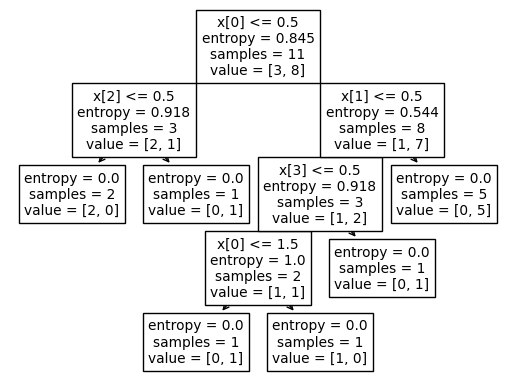

In [46]:
tree.plot_tree(dc);